# Trabalho 1 - Deep Learning

**Integrantes:**


*   Victor Teodoro Goraieb
*   Vitor Anastácio da SilvaItem da lista
*   André de Souza Gonçalves

**Objetivo**

>  Treinar e explorar o comportamento de diferentes componentes que integram uma Rede Neural Convolucional (CNN), usando o dataset CIFAR-10 (https://www.cs.toronto.edu/~kriz/cifar.html). Aproveite os notebooks compartilhados em aula para construir sua solução.

#### **1. (0,5) Separe 20% dos dados de treinamento para validação. Todos os treinamentos intermediários devem ser avaliados neste conjunto de validação.**

In [ ]:
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import numpy as np

In [ ]:
np.random.seed(42)

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [ ]:
channels = x_train.shape[3]
height = x_train.shape[2]
width = x_train.shape[1]

In [ ]:
train_data = x_train.reshape(x_train.shape[0], width, height, channels)
val_data = x_val.reshape(x_val.shape[0], width, height, channels)
test_data = x_test.reshape(x_test.shape[0], width, height, channels)

In [ ]:
train_features = train_data / 255
val_features = val_data / 255
test_features = test_data / 255

In [ ]:
train_target = np_utils.to_categorical(y_train)
val_target = np_utils.to_categorical(y_val)
test_target = np_utils.to_categorical(y_test)
number_of_classes = test_target.shape[1]
input_shape = (width, height, channels)

In [ ]:
labels = ['AVIÃO','AUTOMÓVEL','PÁSSARO','GATO','CERVO','CACHORRO','SAPO','CAVALO','BARCO','CAMINHÃO']

#### **2. (1,0) Construa uma rede neural convolucional para baseline. Sugestão: comece por uma arquitetura simples. Quanto mais simples, melhor.**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras import backend as K 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import classification_report

In [ ]:
class CreateKerasNetwork():
  def design_network(self, network_arrangement, eval_params):
    model = Sequential()
    for layer in network_arrangement:
        model.add(layer)
    model.compile(**eval_params)
    self.model = model

  def train_model(self, train_features, train_target, val_features, val_target, epochs, batch_size):
    self.history = self.model.fit(x = train_features, y = train_target, validation_data = (val_features, val_target), epochs = epochs, batch_size = batch_size)

  def plot_loss_evaluation(self):

    train_loss = pd.DataFrame({'loss': self.history.history['loss']})
    val_loss =  pd.DataFrame({'val_loss': self.history.history['val_loss']})

    df = pd.concat([train_loss, val_loss], axis = 0)

    sns.set_style('darkgrid')
    sns.lineplot(data = df)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.figure(figsize = (10,10))
    plt.show()

  def plot_confusion_matrix(self, labels, y, x):

    matrix = metrics.confusion_matrix(y, np.argmax(self.model.predict(x), axis=1), normalize = 'true')
    self.matrix = matrix
    sns.heatmap(matrix, cmap = 'mako', annot = True, fmt = '.2%', xticklabels= labels, yticklabels = labels)
    plt.rcParams['figure.figsize'] = (24, 6)


In [ ]:
baseline = CreateKerasNetwork()

In [ ]:
network_arrangement = [
    Conv2D(filters=64, kernel_size=(5, 5), input_shape=input_shape, activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(number_of_classes, activation='softmax')
]

evals_params = {
        'loss' : 'categorical_crossentropy', 
        'optimizer' : 'sgd', 
        'metrics' : ['accuracy']
}

baseline.design_network(network_arrangement = network_arrangement, eval_params = evals_params)

In [ ]:
baseline.train_model(train_features, train_target, val_features, val_target, epochs = 60, batch_size = 128)

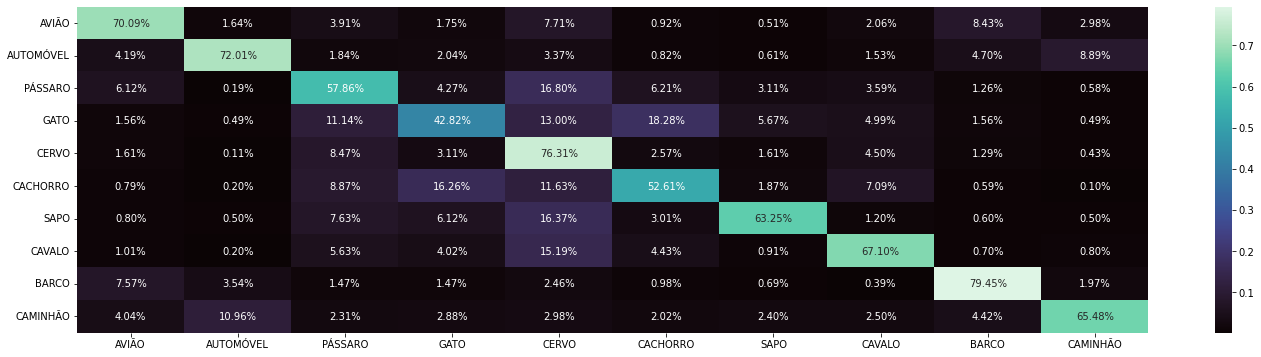

In [ ]:
baseline.plot_confusion_matrix(y = y_val, x = val_features, labels=labels)

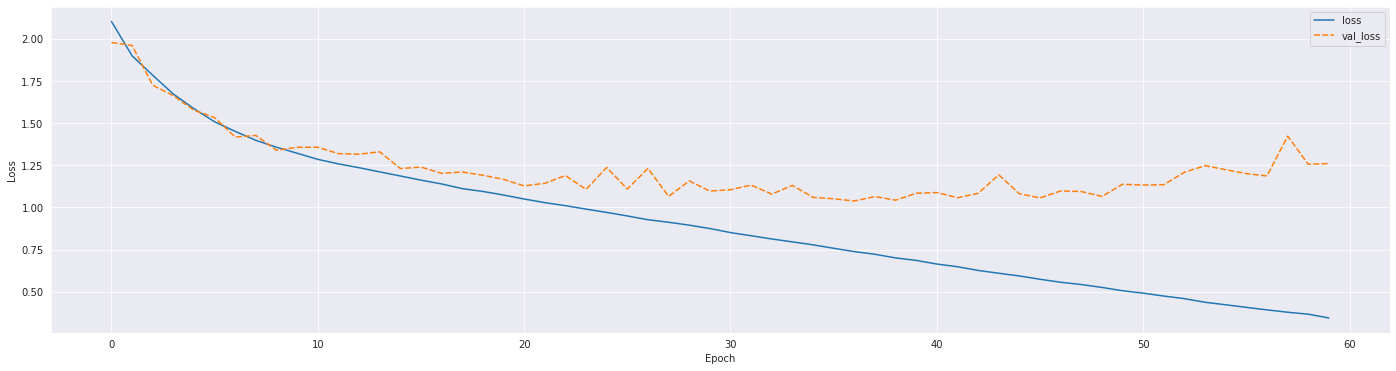

<Figure size 720x720 with 0 Axes>

In [ ]:
baseline.plot_loss_evaluation()

In [ ]:
baseline.model.save('/content/weights_baseline.h5')
#baseline.model.load_weights('weights_baseline.h5')

**3. (0,5) Explore o impacto de três diferentes funções de ativação.**

In [ ]:
baseline_tanh = CreateKerasNetwork()

network_arrangement = [
  Conv2D(filters=64, kernel_size=(5, 5), input_shape=input_shape, activation= 'tanh'),
  MaxPooling2D(pool_size=(2, 2)),
  Flatten(),
  Dense(128, activation= 'tanh'),
  Dense(128, activation= 'tanh'),
  Dense(number_of_classes, activation='softmax')
]

evals_params = {
        'loss' : 'categorical_crossentropy', 
        'optimizer' : 'sgd', 
        'metrics' : ['accuracy']
}

baseline_tanh.design_network(network_arrangement = network_arrangement, eval_params = evals_params)

baseline_tanh.train_model(train_features, train_target, val_features, val_target, epochs = 60, batch_size = 128)

In [ ]:
baseline_tanh.model.save('/content/weights_baseline_tanh.h5')
#baseline_tanh.model.load_weights('weights_baseline_tanh.h5')

In [ ]:
baseline_sigmoid = CreateKerasNetwork()

network_arrangement = [
  Conv2D(filters=64, kernel_size=(5, 5), input_shape=input_shape, activation= 'sigmoid'),
  MaxPooling2D(pool_size=(2, 2)),
  Flatten(),
  Dense(128, activation= 'sigmoid'),
  Dense(128, activation= 'sigmoid'),
  Dense(number_of_classes, activation='softmax')
]

evals_params = {
        'loss' : 'categorical_crossentropy', 
        'optimizer' : 'sgd', 
        'metrics' : ['accuracy']
}

baseline_sigmoid.design_network(network_arrangement = network_arrangement, eval_params = evals_params)

baseline_sigmoid.train_model(train_features, train_target, val_features, val_target, epochs = 60, batch_size = 128)

In [ ]:
baseline_sigmoid.model.save('/content/weights_baseline_sigmoid.h5')
#baseline_sigmoid.model.load_weights('weights_baseline_sigmoid.h5')

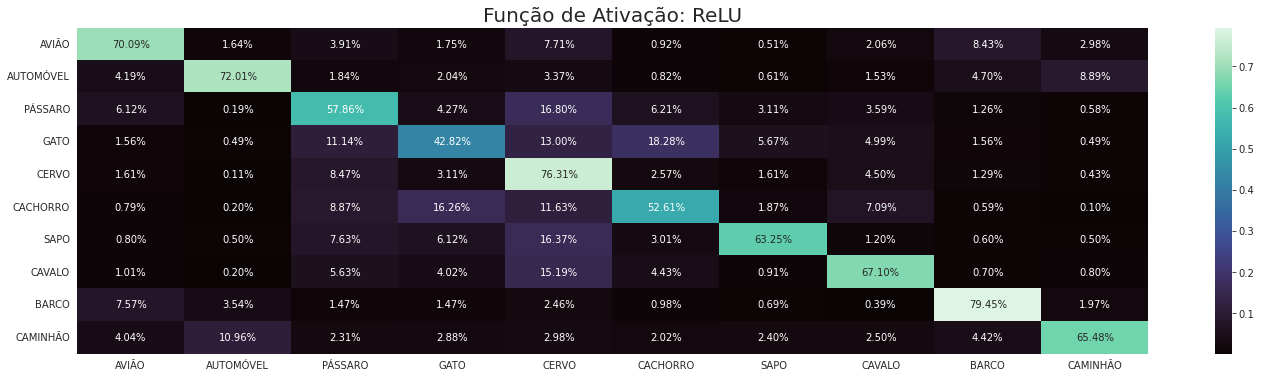

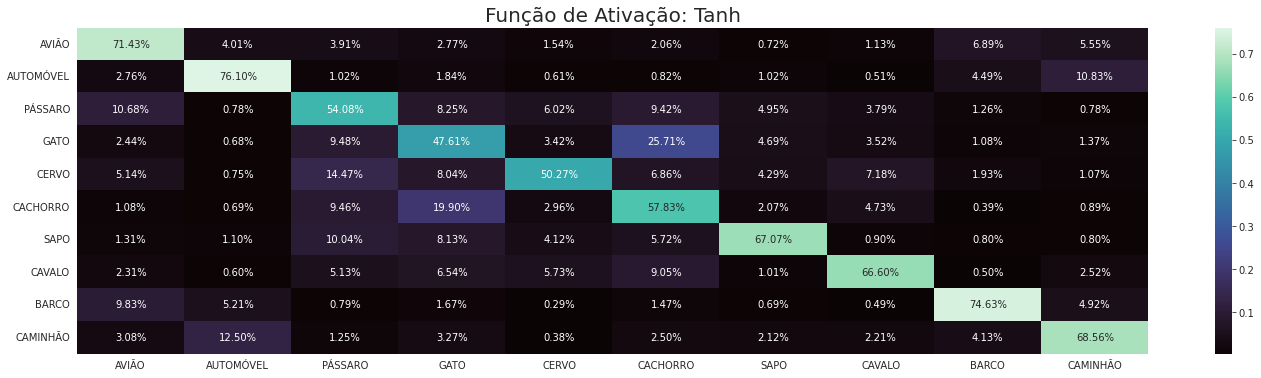

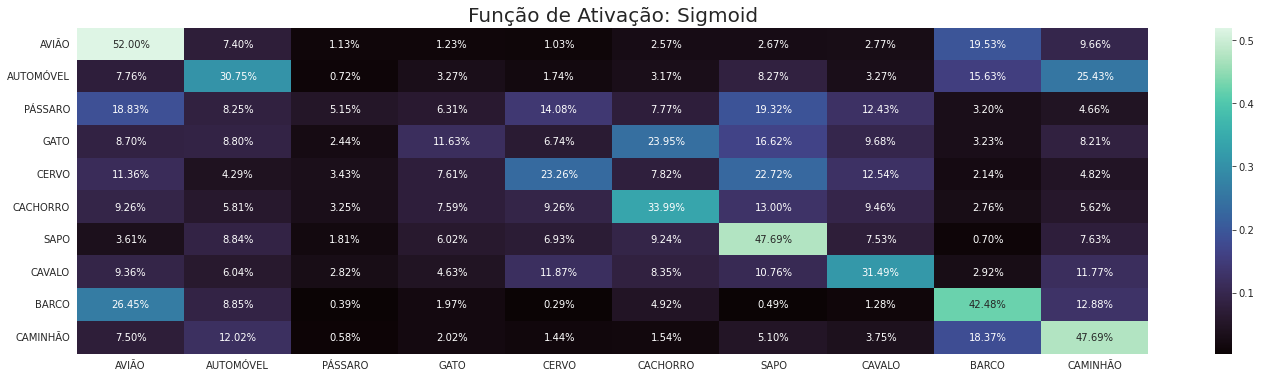

In [ ]:
plt.title('Função de Ativação: ReLU', size = 20)
baseline.plot_confusion_matrix(y = y_val, x = val_features, labels=labels)
plt.show()
plt.title('Função de Ativação: Tanh', size = 20)
baseline_tanh.plot_confusion_matrix(y = y_val, x = val_features, labels=labels)
plt.show()
plt.title('Função de Ativação: Sigmoid', size = 20)
baseline_sigmoid.plot_confusion_matrix(y = y_val, x = val_features, labels=labels)
plt.show()

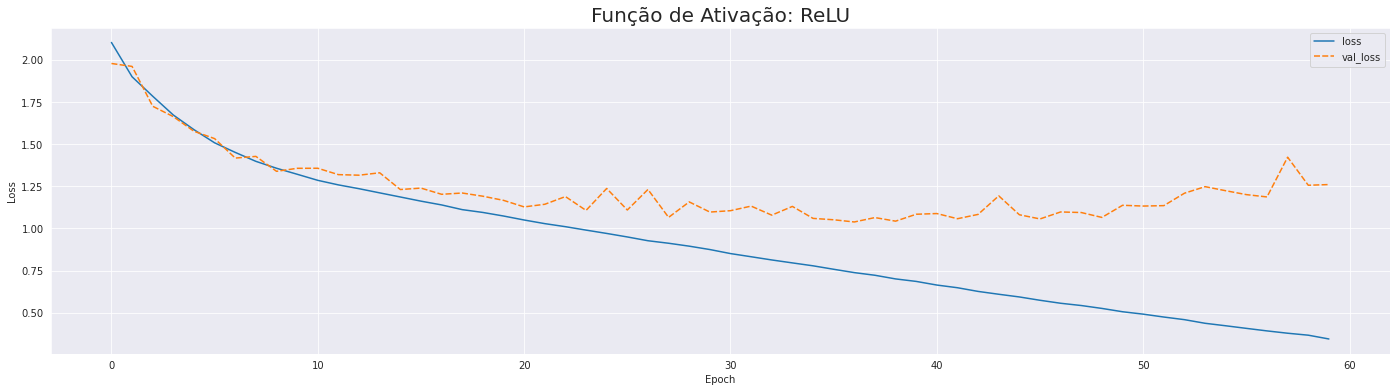

<Figure size 720x720 with 0 Axes>

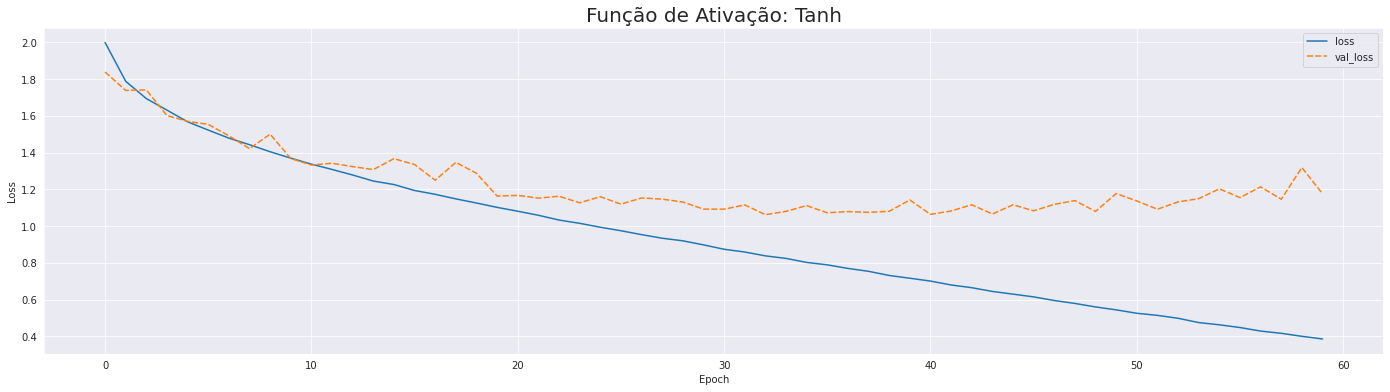

<Figure size 720x720 with 0 Axes>

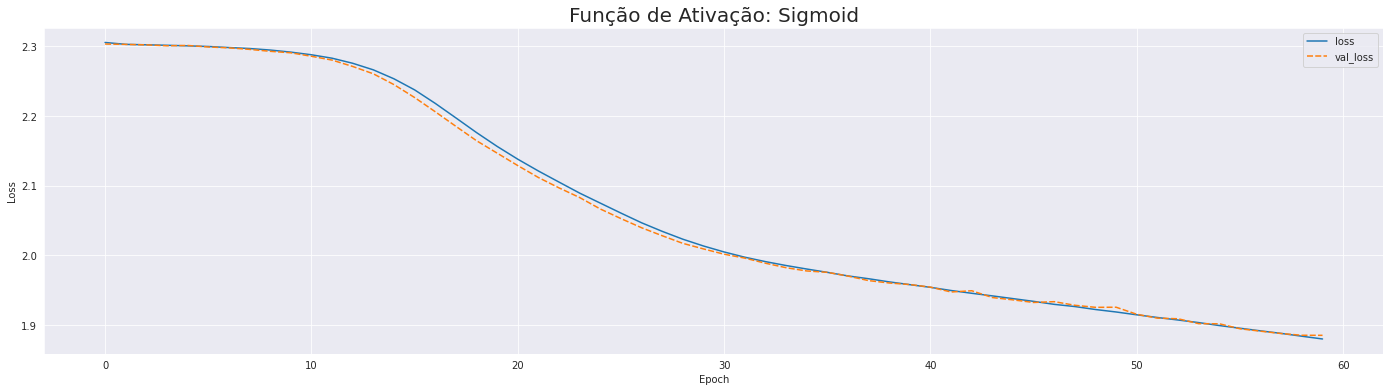

<Figure size 720x720 with 0 Axes>

In [ ]:
plt.title('Função de Ativação: ReLU', size = 20)
baseline.plot_loss_evaluation()
plt.show()
plt.title('Função de Ativação: Tanh', size = 20)
baseline_tanh.plot_loss_evaluation()
plt.show()
plt.title('Função de Ativação: Sigmoid', size = 20)
baseline_sigmoid.plot_loss_evaluation()
plt.show()

In [ ]:
print('Função de Ativação: ReLU ______________________________________________________')
print(classification_report(y_val, np.argmax(baseline.model.predict(val_features), axis=1), target_names=labels))

print('Função de Ativação: Tanh ______________________________________________________')
print(classification_report(y_val, np.argmax(baseline_tanh.model.predict(val_features), axis=1), target_names=labels))

print('Função de Ativação: Sigmoid ___________________________________________________')
print(classification_report(y_val, np.argmax(baseline_sigmoid.model.predict(val_features), axis=1), target_names=labels))

Função de Ativação: ReLU ______________________________________________________
              precision    recall  f1-score   support

       AVIÃO       0.71      0.70      0.70       973
   AUTOMÓVEL       0.79      0.72      0.76       979
     PÁSSARO       0.54      0.58      0.56      1030
        GATO       0.51      0.43      0.47      1023
       CERVO       0.44      0.76      0.56       933
    CACHORRO       0.57      0.53      0.55      1015
        SAPO       0.78      0.63      0.70       996
      CAVALO       0.71      0.67      0.69       994
       BARCO       0.78      0.79      0.78      1017
    CAMINHÃO       0.80      0.65      0.72      1040

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.65     10000
weighted avg       0.66      0.65      0.65     10000

Função de Ativação: Tanh ______________________________________________________
              precision    recall  f1-score   support

       AVIÃO       0.64   

**4. (2,5) Explore o impacto de variar a quantidade de camadas de convolução e pooling. Cuidado com overfitting! Explore, no mínimo, duas arquiteturas diferentes do baseline.**

In [ ]:
network_first_arrangement = CreateKerasNetwork()
network_arrangement_1 = [
    Conv2D(filters=64, kernel_size=(5, 5), input_shape=input_shape, activation='relu'),
    Conv2D(filters=64, kernel_size=(5, 5), input_shape=input_shape, activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(5, 5), input_shape=input_shape, activation='relu'),
    Conv2D(filters=64, kernel_size=(5, 5), input_shape=input_shape, activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(number_of_classes, activation='softmax')
]
evals_params = {
        'loss' : 'categorical_crossentropy', 
        'optimizer' : 'sgd', 
        'metrics' : ['accuracy']
}
network_first_arrangement.design_network(network_arrangement = network_arrangement_1, eval_params = evals_params)
network_first_arrangement.train_model(train_features, train_target, val_features, val_target, epochs = 60, batch_size = 128)

network_first_arrangement.model.save('/content/weights_first_arrangement.h5')
#network_first_arrangement.model.load_weights('weights_first_arrangement.h5')

In [ ]:
network_second_arrangement = CreateKerasNetwork()
network_arrangement_2 = [
    Conv2D(filters=128, kernel_size=(4, 4), input_shape=input_shape, activation='relu', padding= 'valid'),
    MaxPooling2D(pool_size=(3, 3)),
    Conv2D(filters=128, kernel_size=(4, 4), input_shape=input_shape, activation='relu', padding= 'valid'),
    MaxPooling2D(pool_size=(3, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(number_of_classes, activation='softmax')
]
evals_params = {
        'loss' : 'categorical_crossentropy', 
        'optimizer' : 'sgd', 
        'metrics' : ['accuracy']
}
network_second_arrangement.design_network(network_arrangement = network_arrangement_2, eval_params = evals_params)
network_second_arrangement.train_model(train_features, train_target, val_features, val_target, epochs = 60, batch_size = 128)

network_second_arrangement.model.save('/content/weights_second_arrangement.h5')
#network_second_arrangement.model.load_weights('weights_second_arrangement.h5')

Matriz de Confusão -----------------------------------


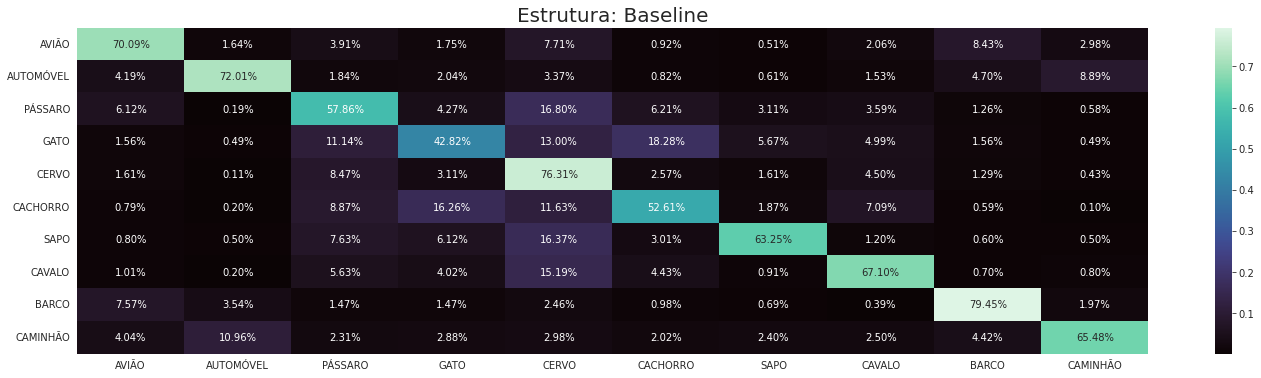

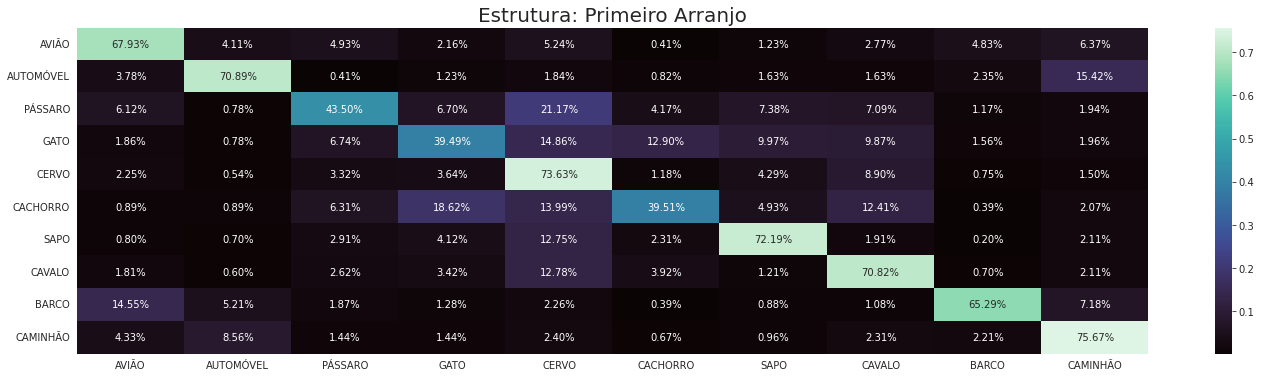

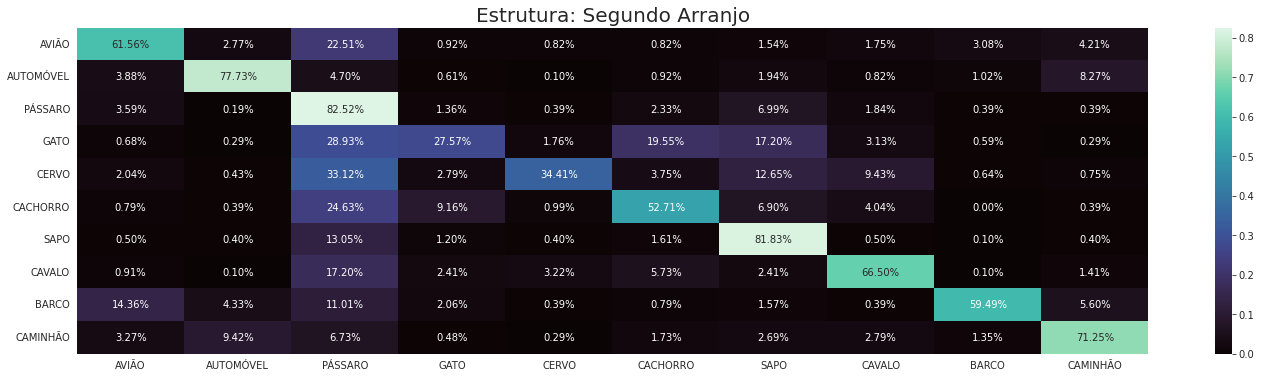

Plot de Loss -----------------------------------


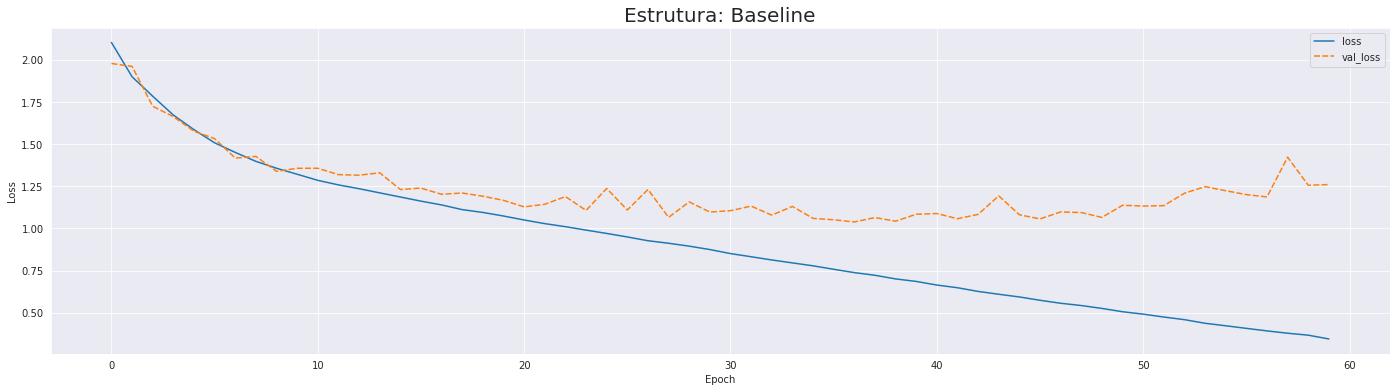

<Figure size 720x720 with 0 Axes>

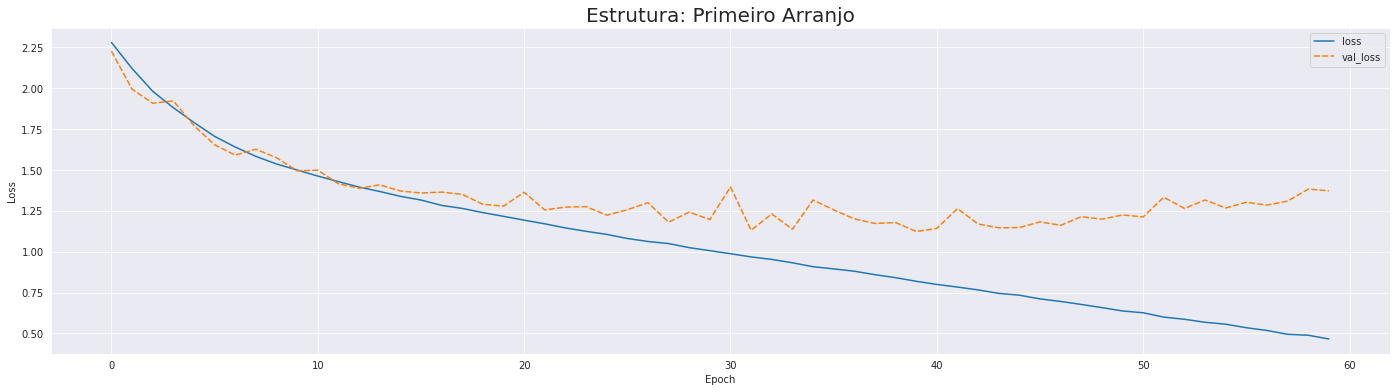

<Figure size 720x720 with 0 Axes>

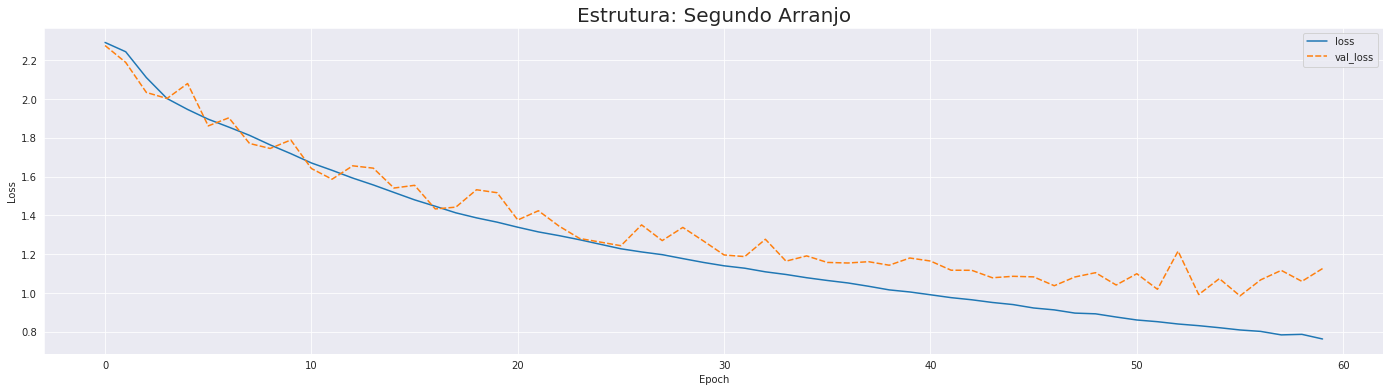

<Figure size 720x720 with 0 Axes>

Métricas do modelo -------------------------------
Estrutura: Baseline
              precision    recall  f1-score   support

       AVIÃO       0.71      0.70      0.70       973
   AUTOMÓVEL       0.79      0.72      0.76       979
     PÁSSARO       0.54      0.58      0.56      1030
        GATO       0.51      0.43      0.47      1023
       CERVO       0.44      0.76      0.56       933
    CACHORRO       0.57      0.53      0.55      1015
        SAPO       0.78      0.63      0.70       996
      CAVALO       0.71      0.67      0.69       994
       BARCO       0.78      0.79      0.78      1017
    CAMINHÃO       0.80      0.65      0.72      1040

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.65     10000
weighted avg       0.66      0.65      0.65     10000

Estrutura: Primeiro Arranjo
              precision    recall  f1-score   support

       AVIÃO       0.64      0.68      0.66       973
   AUTOMÓVEL       0.76      0.71

In [ ]:
print('Matriz de Confusão -----------------------------------')

plt.title('Estrutura: Baseline', size = 20)
baseline.plot_confusion_matrix(y = y_val, x = val_features, labels=labels)
plt.show()
plt.title('Estrutura: Primeiro Arranjo', size = 20)
network_first_arrangement.plot_confusion_matrix(y = y_val, x = val_features, labels=labels)
plt.show()
plt.title('Estrutura: Segundo Arranjo', size = 20)
network_second_arrangement.plot_confusion_matrix(y = y_val, x = val_features, labels=labels)
plt.show()

print('Plot de Loss -----------------------------------')
plt.title('Estrutura: Baseline', size = 20)
baseline.plot_loss_evaluation()
plt.show()
plt.title('Estrutura: Primeiro Arranjo', size = 20)
network_first_arrangement.plot_loss_evaluation()
plt.show()
plt.title('Estrutura: Segundo Arranjo', size = 20)
network_second_arrangement.plot_loss_evaluation()
plt.show()

print('Métricas do modelo -------------------------------')
print('Estrutura: Baseline')
print(classification_report(y_val, np.argmax(baseline.model.predict(val_features), axis=1), target_names=labels))

print('Estrutura: Primeiro Arranjo')
print(classification_report(y_val, np.argmax(network_first_arrangement.model.predict(val_features), axis=1), target_names=labels))

print('Estrutura: Segundo Arranjo')
print(classification_report(y_val, np.argmax(network_second_arrangement.model.predict(val_features), axis=1), target_names=labels))

**5. (1,5) Explore o uso de duas diferentes inicializações e regularizações.**

In [ ]:
from keras import regularizers

In [ ]:
baseline_random = CreateKerasNetwork()

network_arrangement = [
  Conv2D(filters=64, kernel_size=(5, 5), input_shape=input_shape, activation= 'relu', kernel_initializer = 'random_normal'),
  MaxPooling2D(pool_size=(2, 2)),
  Flatten(),
  Dense(128, activation= 'relu', kernel_initializer = 'random_normal'),
  Dense(128, activation= 'relu', kernel_initializer = 'random_normal'),
  Dense(number_of_classes, activation='softmax')
]

evals_params = {
        'loss' : 'categorical_crossentropy', 
        'optimizer' : 'sgd', 
        'metrics' : ['accuracy']
}

baseline_random.design_network(network_arrangement = network_arrangement, eval_params = evals_params)

baseline_random.train_model(train_features, train_target, val_features, val_target, epochs = 60, batch_size = 128)

baseline_random.model.save('/content/weights_baseline_random.h5')
#baseline_random.model.load_weights('weights_baseline_random.h5')

In [ ]:
baseline_glorot = CreateKerasNetwork()

network_arrangement = [
  Conv2D(filters=64, kernel_size=(5, 5), input_shape=input_shape, activation= 'relu', kernel_initializer = 'glorot_uniform'),
  MaxPooling2D(pool_size=(2, 2)),
  Flatten(),
  Dense(128, activation= 'relu', kernel_initializer = 'glorot_uniform'),
  Dense(128, activation= 'relu', kernel_initializer = 'glorot_uniform'),
  Dense(number_of_classes, activation='softmax')
]

evals_params = {
        'loss' : 'categorical_crossentropy', 
        'optimizer' : 'sgd', 
        'metrics' : ['accuracy']
}

baseline_glorot.design_network(network_arrangement = network_arrangement, eval_params = evals_params)

baseline_glorot.train_model(train_features, train_target, val_features, val_target, epochs = 60, batch_size = 128)

baseline_glorot.model.save('/content/weights_baseline_glorot.h5')
#baseline_glorot.model.load_weights('weights_baseline_glorot.h5')

Matriz de Confusão -----------------------------------


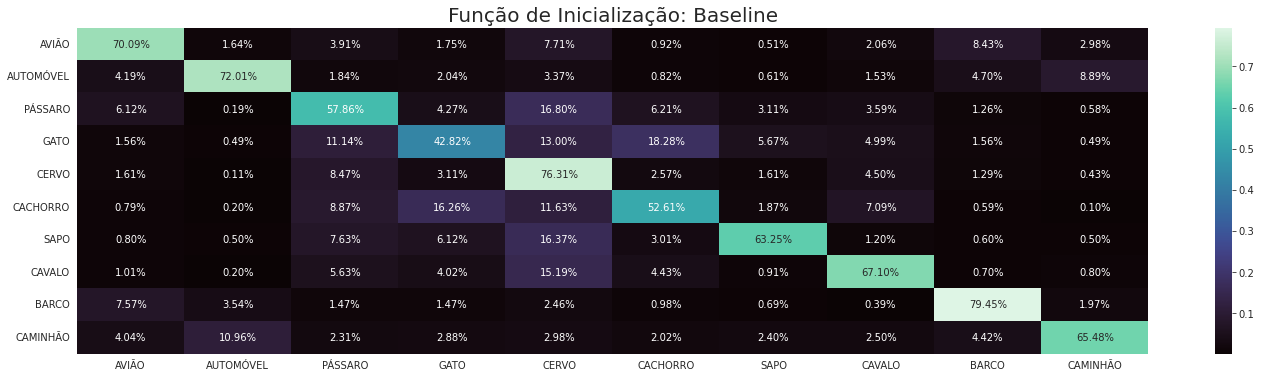

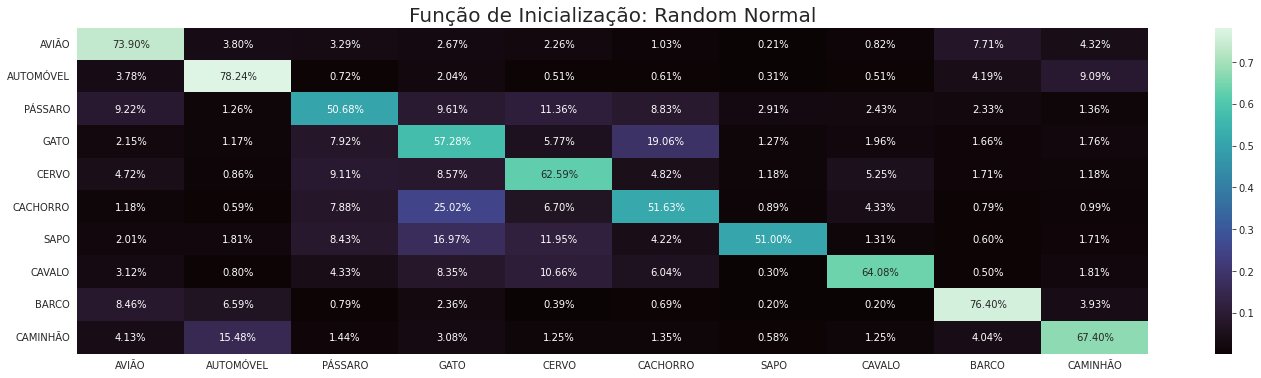

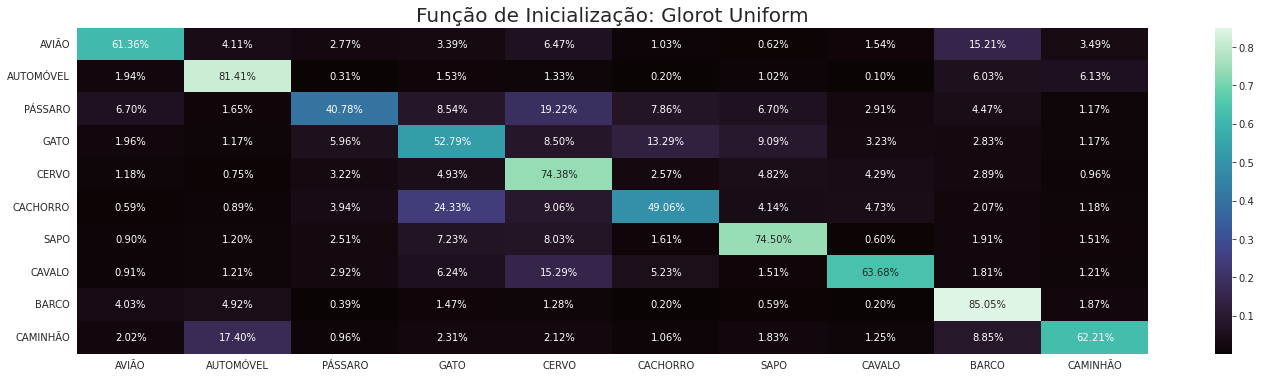

Plot de Loss -----------------------------------


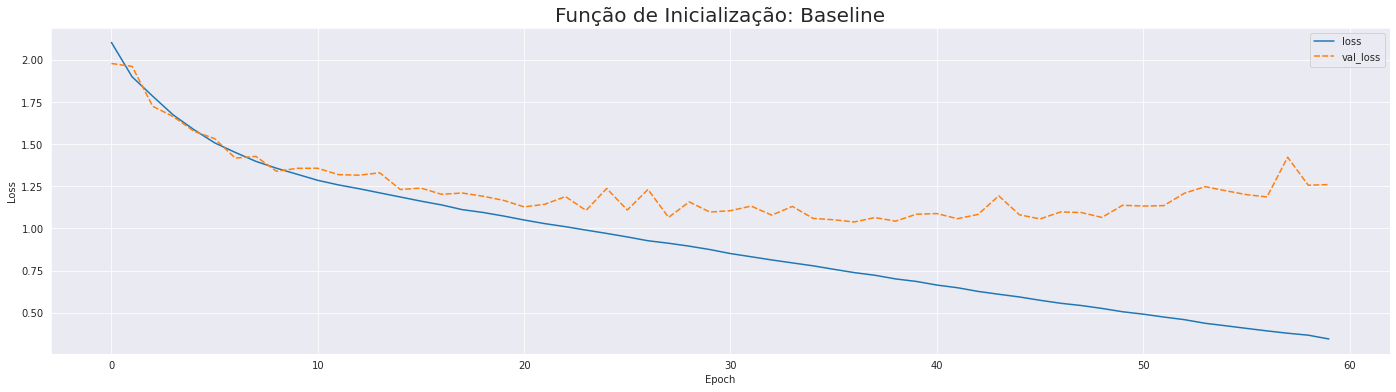

<Figure size 720x720 with 0 Axes>

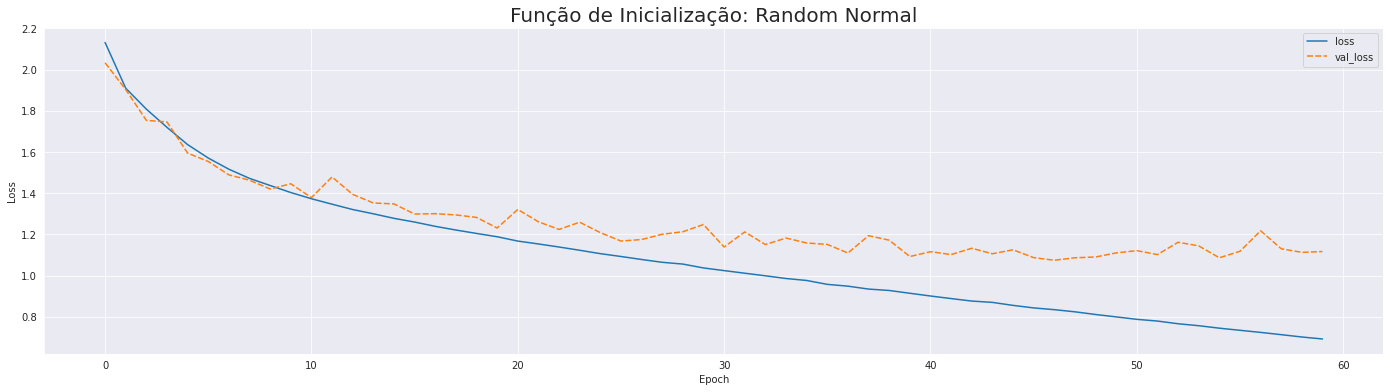

<Figure size 720x720 with 0 Axes>

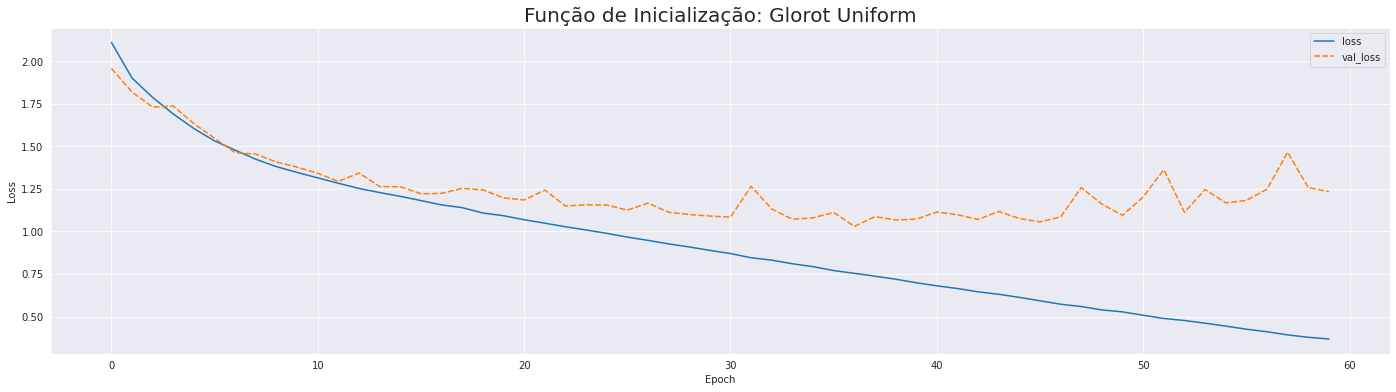

<Figure size 720x720 with 0 Axes>

Métricas do modelo -------------------------------
Função de Inicialização: Baseline
              precision    recall  f1-score   support

       AVIÃO       0.71      0.70      0.70       973
   AUTOMÓVEL       0.79      0.72      0.76       979
     PÁSSARO       0.54      0.58      0.56      1030
        GATO       0.51      0.43      0.47      1023
       CERVO       0.44      0.76      0.56       933
    CACHORRO       0.57      0.53      0.55      1015
        SAPO       0.78      0.63      0.70       996
      CAVALO       0.71      0.67      0.69       994
       BARCO       0.78      0.79      0.78      1017
    CAMINHÃO       0.80      0.65      0.72      1040

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.65     10000
weighted avg       0.66      0.65      0.65     10000

Função de Inicialização: Random Normal
              precision    recall  f1-score   support

       AVIÃO       0.65      0.74      0.69       973
   AUTOM

In [ ]:
print('Matriz de Confusão -----------------------------------')

plt.title('Função de Inicialização: Baseline', size = 20)
baseline.plot_confusion_matrix(y = y_val, x = val_features, labels=labels)
plt.show()
plt.title('Função de Inicialização: Random Normal', size = 20)
baseline_random.plot_confusion_matrix(y = y_val, x = val_features, labels=labels)
plt.show()
plt.title('Função de Inicialização: Glorot Uniform', size = 20)
baseline_glorot.plot_confusion_matrix(y = y_val, x = val_features, labels=labels)
plt.show()

print('Plot de Loss -----------------------------------')
plt.title('Função de Inicialização: Baseline', size = 20)
baseline.plot_loss_evaluation()
plt.show()
plt.title('Função de Inicialização: Random Normal', size = 20)
baseline_random.plot_loss_evaluation()
plt.show()
plt.title('Função de Inicialização: Glorot Uniform', size = 20)
baseline_glorot.plot_loss_evaluation()
plt.show()

print('Métricas do modelo -------------------------------')
print('Função de Inicialização: Baseline')
print(classification_report(y_val, np.argmax(baseline.model.predict(val_features), axis=1), target_names=labels))

print('Função de Inicialização: Random Normal')
print(classification_report(y_val, np.argmax(baseline_random.model.predict(val_features), axis=1), target_names=labels))

print('Função de Inicialização: Glorot Uniform')
print(classification_report(y_val, np.argmax(baseline_glorot.model.predict(val_features), axis=1), target_names=labels))

In [ ]:
baseline_regl2001 = CreateKerasNetwork()

network_arrangement = [
  Conv2D(filters=64, kernel_size=(5, 5), input_shape=input_shape, activation= 'relu', kernel_regularizer= regularizers.l2(0.01)),
  MaxPooling2D(pool_size=(2, 2)),
  Flatten(),
  Dense(128, activation= 'relu', kernel_regularizer= regularizers.l2(0.01)),
  Dense(128, activation= 'relu', kernel_regularizer= regularizers.l2(0.01)),
  Dense(number_of_classes, activation='softmax')
]

evals_params = {
        'loss' : 'categorical_crossentropy', 
        'optimizer' : 'sgd', 
        'metrics' : ['accuracy']
}

baseline_regl2001.design_network(network_arrangement = network_arrangement, eval_params = evals_params)

baseline_regl2001.train_model(train_features, train_target, val_features, val_target, epochs = 60, batch_size = 128)

baseline_regl2001.model.save('/content/weights_baseline_regl2001.h5')
#baseline_regl2001.model.load_weights('weights_baseline_regl2001.h5')

In [ ]:
baseline_regl2010 = CreateKerasNetwork()

network_arrangement = [
  Conv2D(filters=64, kernel_size=(5, 5), input_shape=input_shape, activation= 'relu', kernel_regularizer= regularizers.l2(0.10)),
  MaxPooling2D(pool_size=(2, 2)),
  Flatten(),
  Dense(128, activation= 'relu', kernel_regularizer= regularizers.l2(0.10)),
  Dense(128, activation= 'relu', kernel_regularizer= regularizers.l2(0.10)),
  Dense(number_of_classes, activation='softmax')
]

evals_params = {
        'loss' : 'categorical_crossentropy', 
        'optimizer' : 'sgd', 
        'metrics' : ['accuracy']
}

baseline_regl2010.design_network(network_arrangement = network_arrangement, eval_params = evals_params)

baseline_regl2010.train_model(train_features, train_target, val_features, val_target, epochs = 60, batch_size = 128)

baseline_regl2010.model.save('/content/weights_baseline_regl2010.h5')
#baseline_regl2010.model.load_weights('weights_baseline_regl2010.h5')

Matriz de Confusão -----------------------------------


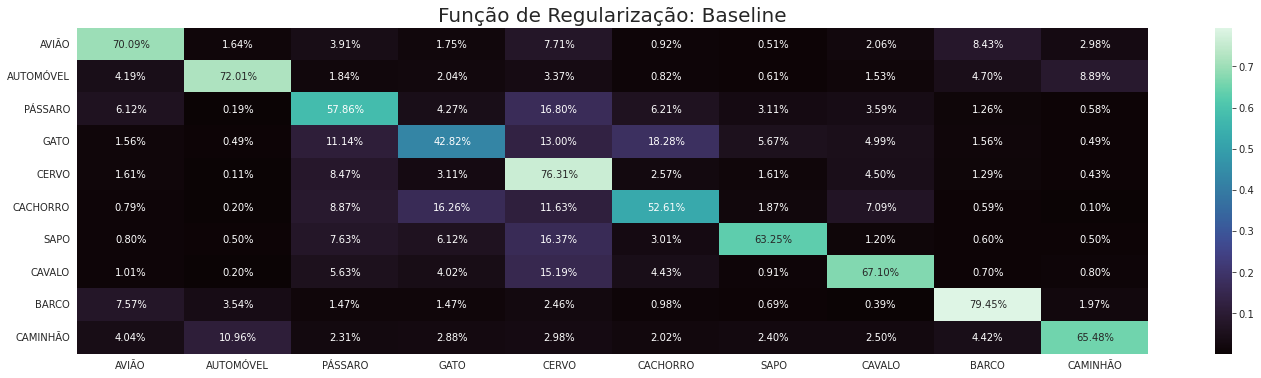

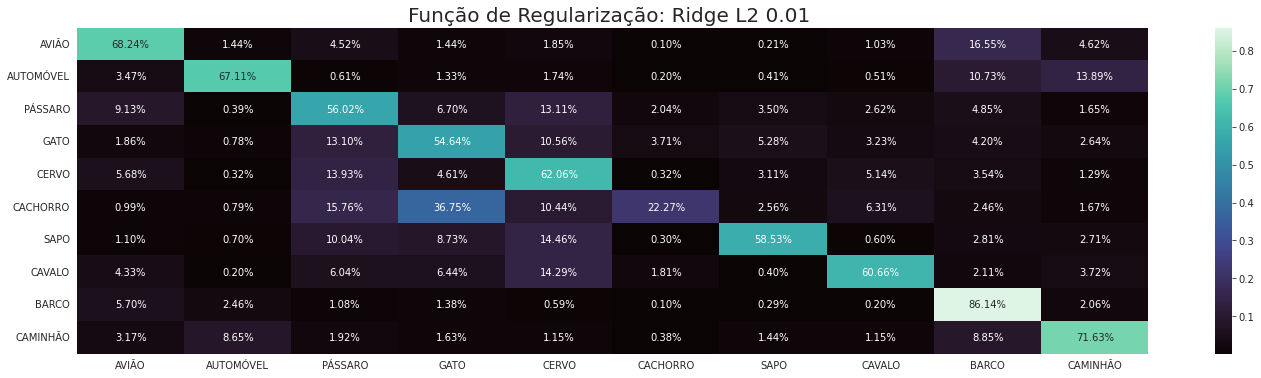

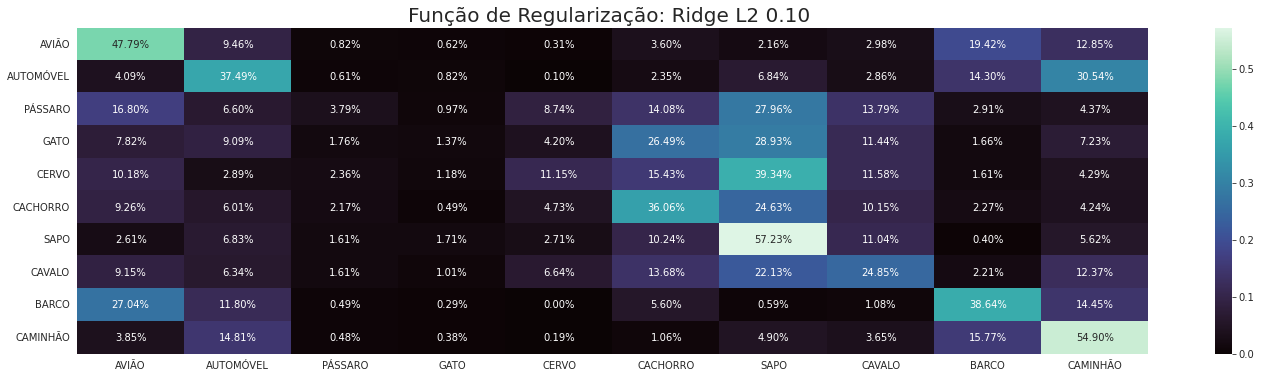

Plot de Loss -----------------------------------


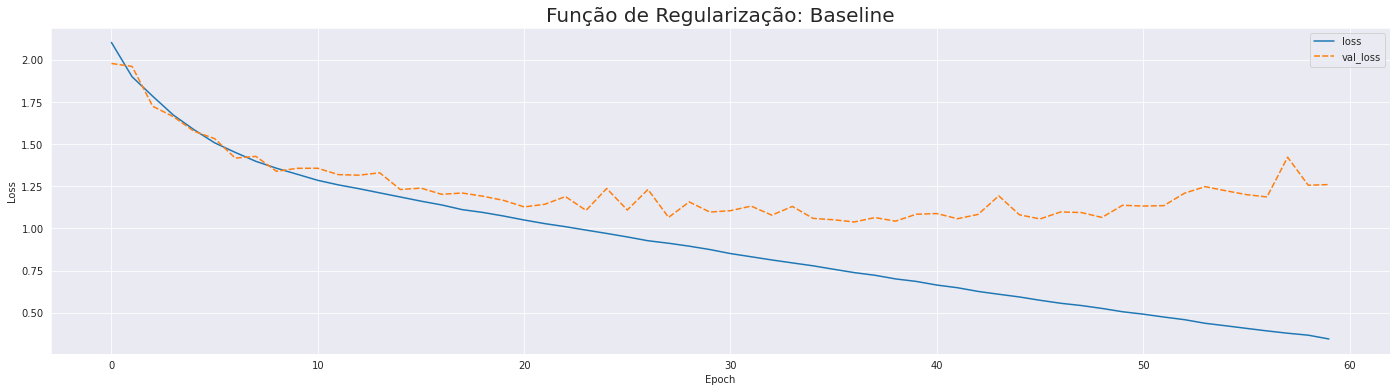

<Figure size 720x720 with 0 Axes>

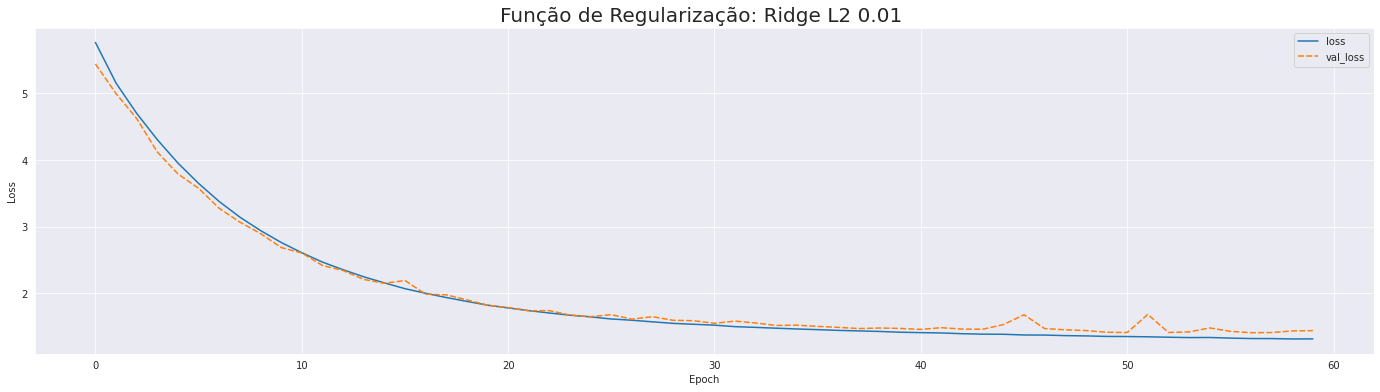

<Figure size 720x720 with 0 Axes>

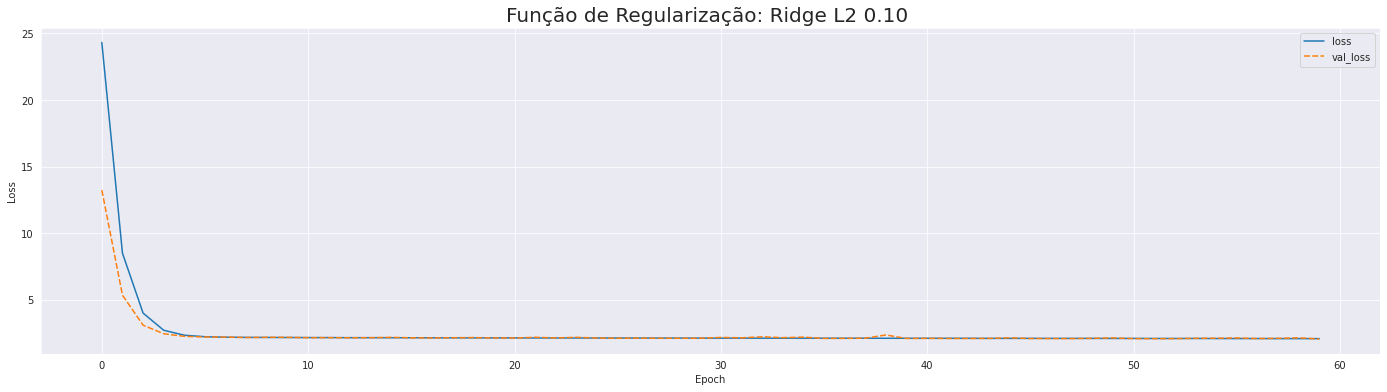

<Figure size 720x720 with 0 Axes>

Métricas do modelo -------------------------------
Função de Regularização: Baseline
              precision    recall  f1-score   support

       AVIÃO       0.71      0.70      0.70       973
   AUTOMÓVEL       0.79      0.72      0.76       979
     PÁSSARO       0.54      0.58      0.56      1030
        GATO       0.51      0.43      0.47      1023
       CERVO       0.44      0.76      0.56       933
    CACHORRO       0.57      0.53      0.55      1015
        SAPO       0.78      0.63      0.70       996
      CAVALO       0.71      0.67      0.69       994
       BARCO       0.78      0.79      0.78      1017
    CAMINHÃO       0.80      0.65      0.72      1040

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.65     10000
weighted avg       0.66      0.65      0.65     10000

Função de Regularização: Ridge L2 0.01 
              precision    recall  f1-score   support

       AVIÃO       0.65      0.68      0.67       973
   AUTO

In [ ]:
print('Matriz de Confusão -----------------------------------')

plt.title('Função de Regularização: Baseline', size = 20)
baseline.plot_confusion_matrix(y = y_val, x = val_features, labels=labels)
plt.show()
plt.title('Função de Regularização: Ridge L2 0.01 ', size = 20)
baseline_regl2001.plot_confusion_matrix(y = y_val, x = val_features, labels=labels)
plt.show()
plt.title('Função de Regularização: Ridge L2 0.10 ', size = 20)
baseline_regl2010.plot_confusion_matrix(y = y_val, x = val_features, labels=labels)
plt.show()

print('Plot de Loss -----------------------------------')
plt.title('Função de Regularização: Baseline', size = 20)
baseline.plot_loss_evaluation()
plt.show()
plt.title('Função de Regularização: Ridge L2 0.01 ', size = 20)
baseline_regl2001.plot_loss_evaluation()
plt.show()
plt.title('Função de Regularização: Ridge L2 0.10 ', size = 20)
baseline_regl2010.plot_loss_evaluation()
plt.show()

print('Métricas do modelo -------------------------------')
print('Função de Regularização: Baseline')
print(classification_report(y_val, np.argmax(baseline.model.predict(val_features), axis=1), target_names=labels))

print('Função de Regularização: Ridge L2 0.01 ')
print(classification_report(y_val, np.argmax(baseline_regl2001.model.predict(val_features), axis=1), target_names=labels))

print('Função de Regularização: Ridge L2 0.10 ')
print(classification_report(y_val, np.argmax(baseline_regl2010.model.predict(val_features), axis=1), target_names=labels))

**6. (0,5) Avalie o uso de dropout na camada totalmente conectada.**


In [ ]:
baseline_dropout = CreateKerasNetwork()

network_arrangement = [
  Conv2D(filters=64, kernel_size=(5, 5), input_shape=input_shape, activation= 'relu'),
  MaxPooling2D(pool_size=(2, 2)),
  Flatten(),
  Dense(128, activation= 'relu'),
  Dropout(0.4),
  Dense(128, activation= 'relu'),
  Dense(number_of_classes, activation='softmax')
]

evals_params = {
        'loss' : 'categorical_crossentropy', 
        'optimizer' : 'sgd', 
        'metrics' : ['accuracy']
}

baseline_dropout.design_network(network_arrangement = network_arrangement, eval_params = evals_params)

baseline_dropout.train_model(train_features, train_target, val_features, val_target, epochs = 60, batch_size = 128)

baseline_dropout.model.save('/content/weights_baseline_dropout.h5')
#baseline_dropout.model.load_weights('weights_baseline_dropout.h5')

Epoch 1/60
313/313 [==============================] - 4s 13ms/step - loss: 2.1936 - accuracy: 0.1896 - val_loss: 2.0300 - val_accuracy: 0.2976
Epoch 2/60
313/313 [==============================] - 3s 10ms/step - loss: 1.9966 - accuracy: 0.2744 - val_loss: 1.8798 - val_accuracy: 0.3347
Epoch 3/60
313/313 [==============================] - 3s 11ms/step - loss: 1.8933 - accuracy: 0.3203 - val_loss: 1.9008 - val_accuracy: 0.3330
Epoch 4/60
313/313 [==============================] - 3s 10ms/step - loss: 1.8085 - accuracy: 0.3533 - val_loss: 1.6971 - val_accuracy: 0.3863
Epoch 5/60
313/313 [==============================] - 3s 10ms/step - loss: 1.7297 - accuracy: 0.3791 - val_loss: 1.6506 - val_accuracy: 0.4081
Epoch 6/60
313/313 [==============================] - 3s 10ms/step - loss: 1.6591 - accuracy: 0.4038 - val_loss: 1.5769 - val_accuracy: 0.4348
Epoch 7/60
313/313 [==============================] - 3s 10ms/step - loss: 1.6011 - accuracy: 0.4188 - val_loss: 1.5187 - val_accuracy: 0.4559

**7. (1,0) Plote os gráficos da função de loss × número de épocas, para o treino e validação de cada modelo. Houve overfitting?**


Para o Baseline notamos que a partir de uma época de aproximadamente 30, a rede neural passa a diminuir a função de custo no treinamento mas a de validação começa a subir. Esse é um sinal de overfitting

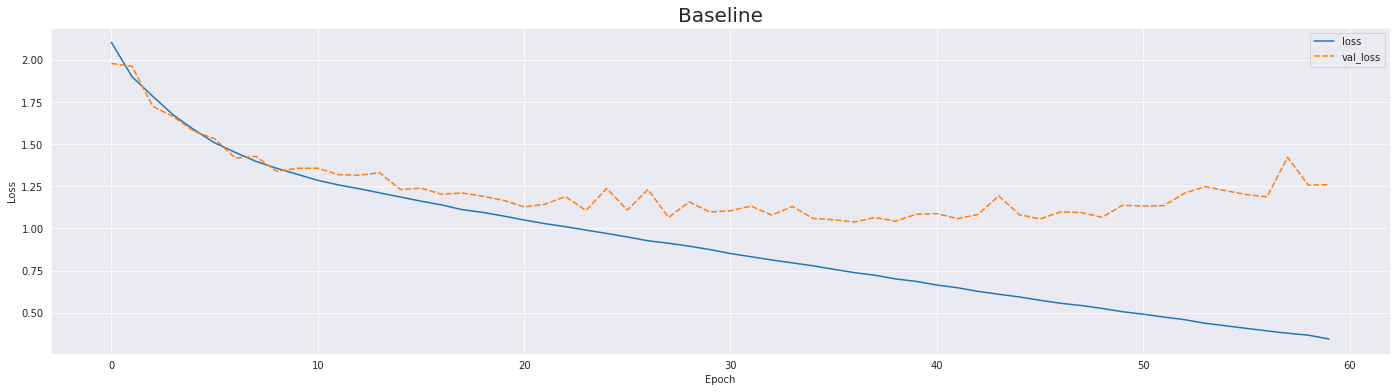

<Figure size 720x720 with 0 Axes>

In [ ]:
plt.title('Baseline', size = 20)
baseline.plot_loss_evaluation()
plt.show()

Avaliando diferentes funções de ativação notamos que com a função Tanh (ao invés de ReLU do Baseline) temos um comportamento semelhante ao modelo inicial. Entretanto nota-se que no início a curva de loss da validação descresce menos rapidamente com Tanh. A conclusão sobre overfitting é similar ao do baseline

Já para a função sigmoide fica claro que o decrescimento das funções de custo é bem mais lento em termos de épocas. Além disso, após aproximadamente 50 épocas nota-se que a curva de loss para treino e validação estacionam em ~1.9. Esse valor é um dos valores iniciais para o baseline indicando um possível underfitting

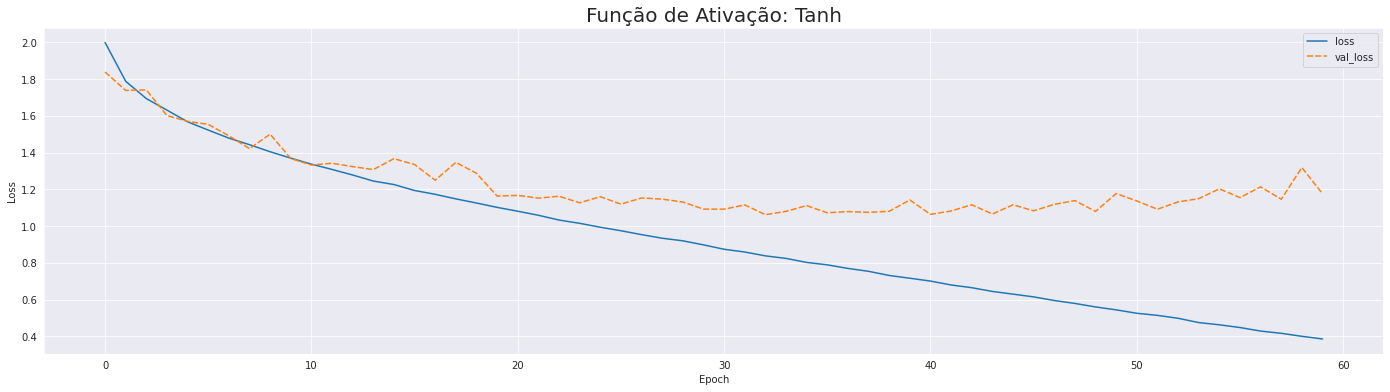

<Figure size 720x720 with 0 Axes>

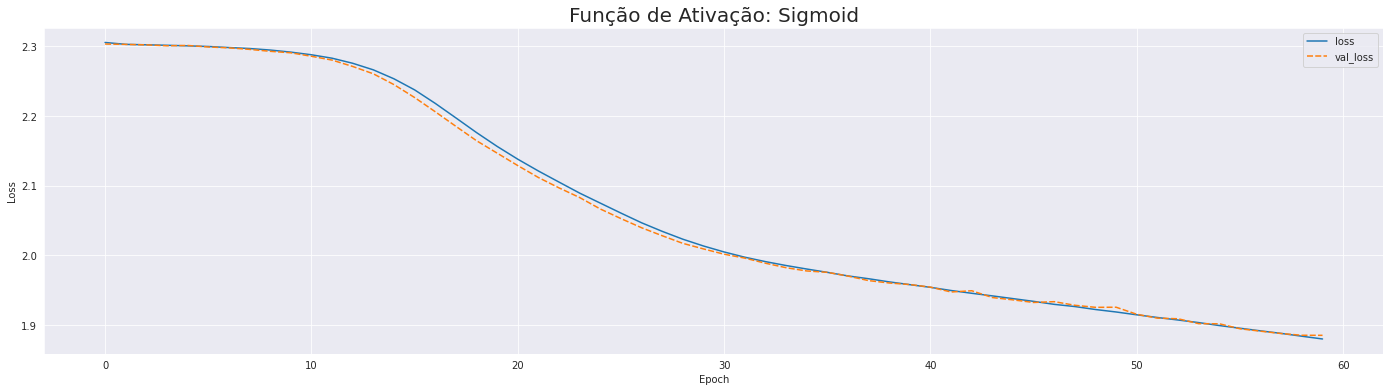

<Figure size 720x720 with 0 Axes>

In [ ]:
plt.title('Função de Ativação: Tanh', size = 20)
baseline_tanh.plot_loss_evaluation()
plt.show()

plt.title('Função de Ativação: Sigmoid', size = 20)
baseline_sigmoid.plot_loss_evaluation()
plt.show()

Quando avaliamos novas estruturas alterando as camadas de convolução e pooling, nota-se que para o primeiro arranjo a situação de overfitting é muito similar ao baseline.

Entretanto para o segundo arranjo, mais complexo, nota-se que a curva ainda não apresenta sinais de overfitting. Tanto o loss da validação como no treino estão ainda em tendência de queda. Esse pode ser um indicativo que esse modelo é mais robusto e precisaria de mais épocas para se superespecializar, em torno de 50-60.

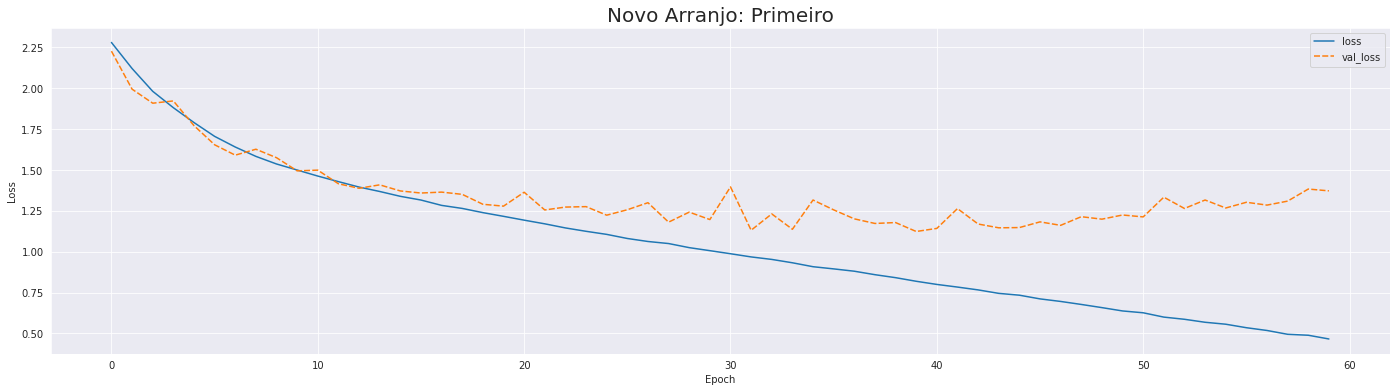

<Figure size 720x720 with 0 Axes>

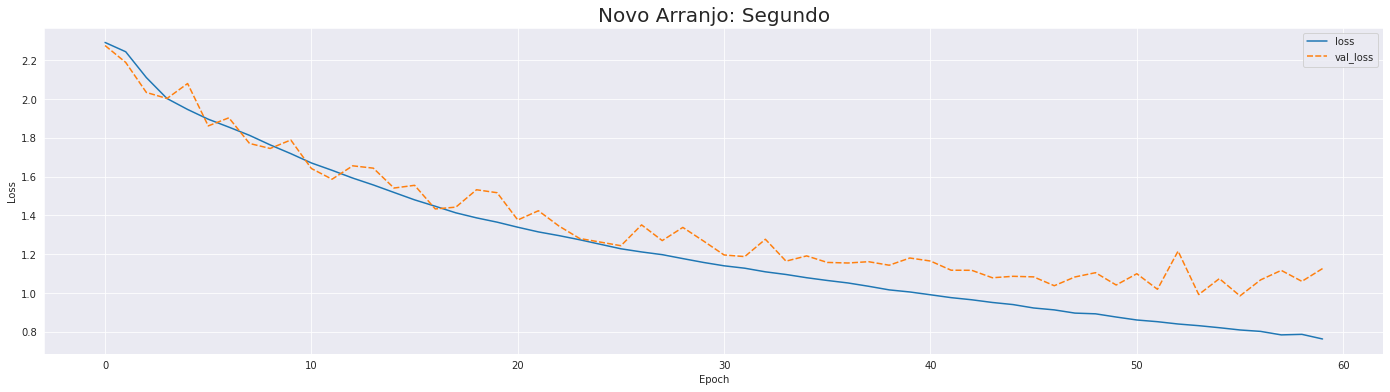

<Figure size 720x720 with 0 Axes>

In [ ]:
plt.title('Novo Arranjo: Primeiro', size = 20)
network_first_arrangement.plot_loss_evaluation()
plt.show()

plt.title('Novo Arranjo: Segundo', size = 20)
network_second_arrangement.plot_loss_evaluation()
plt.show()

Quando avaliamos a função de inicialização percebe-se que com a distribuição Glorot um possível overfitting já passa a acontecer perto de uma época de 30. Com outra função de inicialização, o resultado é mais estável com um possível início de overfitting a partir de 50 épocas

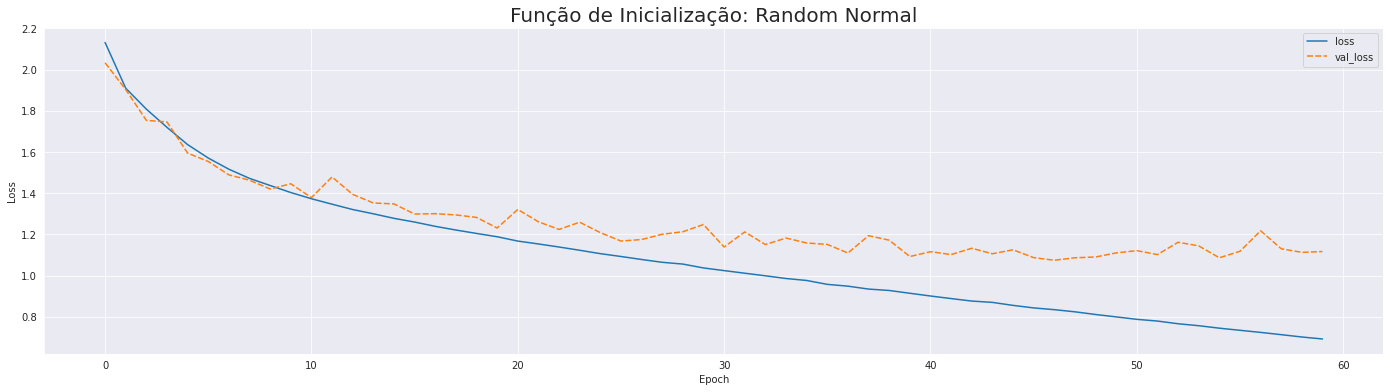

<Figure size 720x720 with 0 Axes>

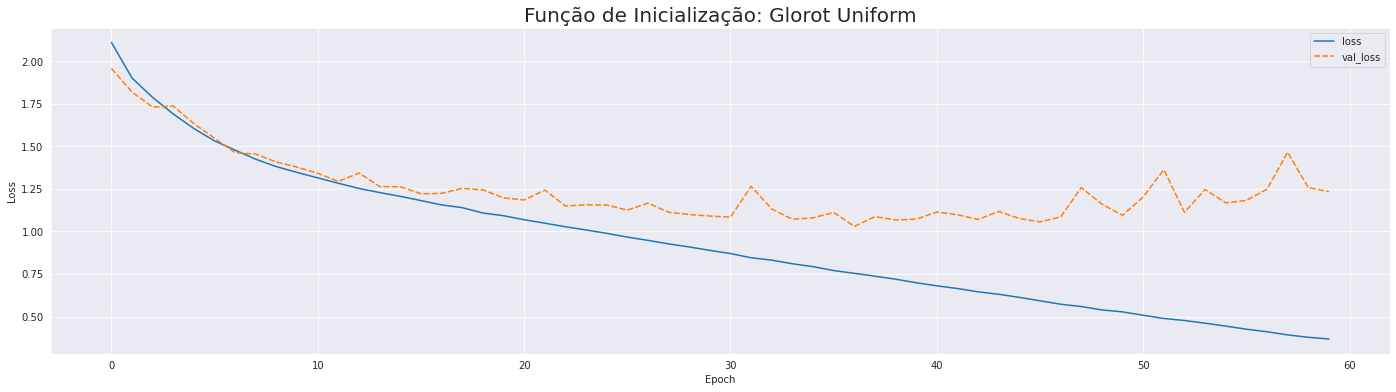

<Figure size 720x720 with 0 Axes>

In [ ]:
plt.title('Função de Inicialização: Random Normal', size = 20)
baseline_random.plot_loss_evaluation()
plt.show()

plt.title('Função de Inicialização: Glorot Uniform', size = 20)
baseline_glorot.plot_loss_evaluation()
plt.show()

A adição de regularização é positiva até certo ponto. Para o primeiro caso, com um fator de regularização de 0.01 a curva de descida da função de custo é bem mais estável, não havendo ainda sinais de overfitting. Já para uma regularização mais alta de 0.1 nota-se um possível underfitting, onde a curva estaciona em um valor relativamente alto de loss (valores iniciais para o baseline)

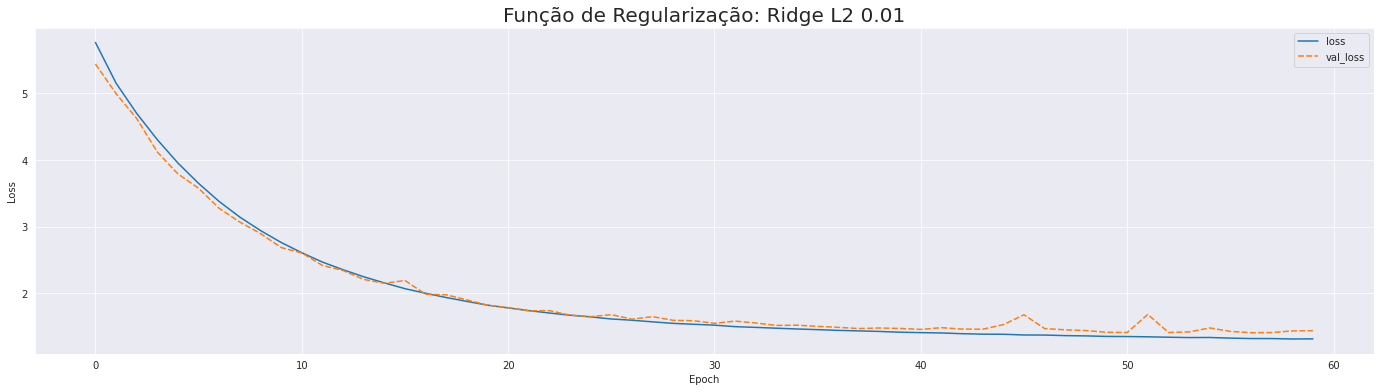

<Figure size 720x720 with 0 Axes>

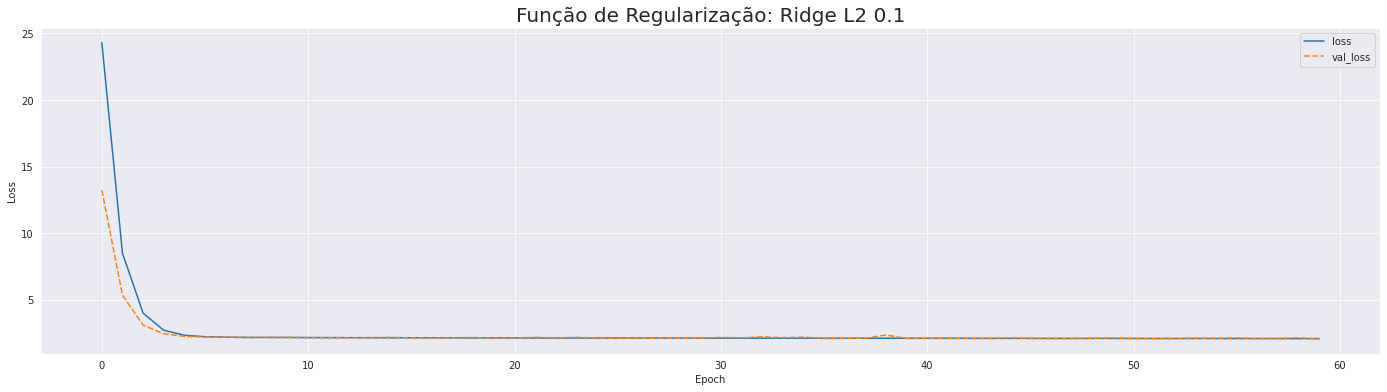

<Figure size 720x720 with 0 Axes>

In [ ]:
plt.title('Função de Regularização: Ridge L2 0.01', size = 20)
baseline_regl2001.plot_loss_evaluation()
plt.show()

plt.title('Função de Regularização: Ridge L2 0.1', size = 20)
baseline_regl2010.plot_loss_evaluation()
plt.show()

Finalmente para a camada de Dropout nota-se que as funções de custo ainda estão estáveis em descida, indicando um possível overfitting para valores acima de 60 épocas.

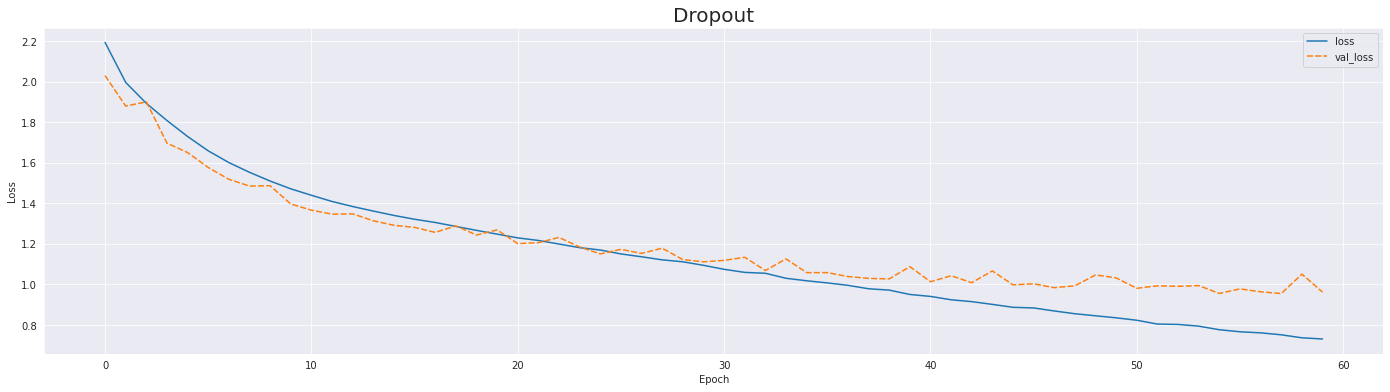

<Figure size 720x720 with 0 Axes>

In [ ]:
plt.title('Dropout', size = 20)
baseline_dropout.plot_loss_evaluation()
plt.show()

**8. (0,5) A partir dos experimentos acima, construa o que você considera o melhor modelo e faça a avaliação no conjunto de teste. Obs: Avaliação no conjunto de teste só pode ser executada uma única vez.**


In [ ]:
from keras.layers import BatchNormalization

In [ ]:
best_model = CreateKerasNetwork()
network_arrangement_2 = [
    Conv2D(filters=248, kernel_size=(4, 4), input_shape=input_shape, activation='relu', padding= 'valid', kernel_initializer='glorot_uniform', kernel_regularizer= regularizers.l2(0.001)),
    MaxPooling2D(pool_size=(3, 3)),
    BatchNormalization(),
    Conv2D(filters=248, kernel_size=(4, 4), input_shape=input_shape, activation='relu', padding= 'valid', kernel_initializer='glorot_uniform', kernel_regularizer= regularizers.l2(0.001)),
    MaxPooling2D(pool_size=(3, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Flatten(),
    Dense(356, activation='relu', kernel_initializer='glorot_uniform', kernel_regularizer= regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='relu', kernel_initializer='glorot_uniform', kernel_regularizer= regularizers.l2(0.001)),
    BatchNormalization(),
    Dense(number_of_classes, activation='softmax')
]
evals_params = {
        'loss' : 'categorical_crossentropy', 
        'optimizer' : 'adam', 
        'metrics' : ['accuracy']
}
best_model.design_network(network_arrangement = network_arrangement_2, eval_params = evals_params)
best_model.train_model(train_features, train_target, val_features, val_target, epochs = 60, batch_size = 128)

best_model.model.save('/content/weights_best_model.h5')
#best_model.model.load_weights('weights_best_model.h5')

Epoch 1/60
313/313 [==============================] - 17s 49ms/step - loss: 2.1761 - accuracy: 0.4760 - val_loss: 5.5346 - val_accuracy: 0.0997
Epoch 2/60
313/313 [==============================] - 15s 47ms/step - loss: 1.6789 - accuracy: 0.6164 - val_loss: 2.2832 - val_accuracy: 0.4460
Epoch 3/60
313/313 [==============================] - 15s 47ms/step - loss: 1.4291 - accuracy: 0.6756 - val_loss: 2.2572 - val_accuracy: 0.4681
Epoch 4/60
313/313 [==============================] - 15s 47ms/step - loss: 1.2609 - accuracy: 0.7102 - val_loss: 2.3053 - val_accuracy: 0.4795
Epoch 5/60
313/313 [==============================] - 15s 47ms/step - loss: 1.1344 - accuracy: 0.7441 - val_loss: 1.4574 - val_accuracy: 0.6431
Epoch 6/60
313/313 [==============================] - 15s 47ms/step - loss: 1.0557 - accuracy: 0.7615 - val_loss: 1.7818 - val_accuracy: 0.5531
Epoch 7/60
313/313 [==============================] - 15s 47ms/step - loss: 1.0020 - accuracy: 0.7805 - val_loss: 1.3798 - val_accuracy:

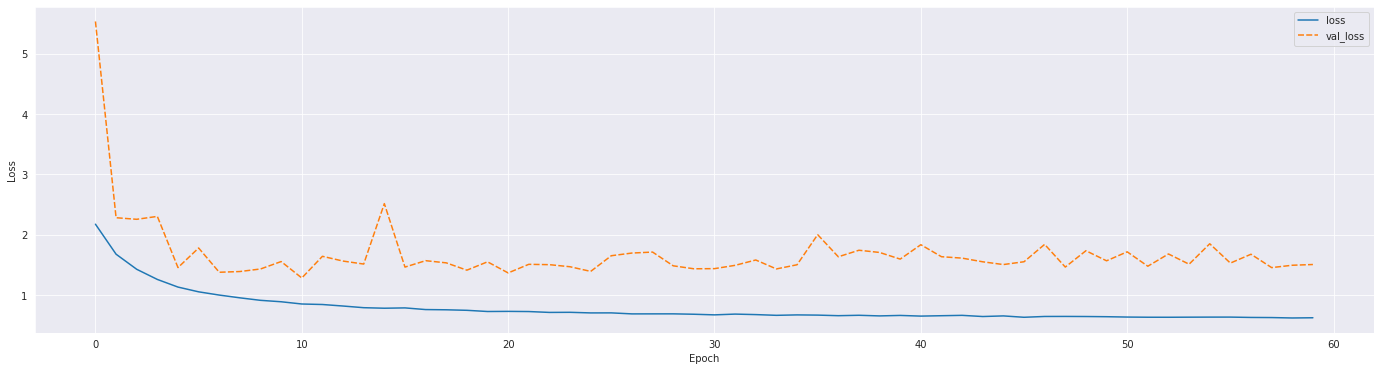

<Figure size 720x720 with 0 Axes>

In [ ]:
best_model.plot_loss_evaluation()

Matriz de Confusão -----------------------------------


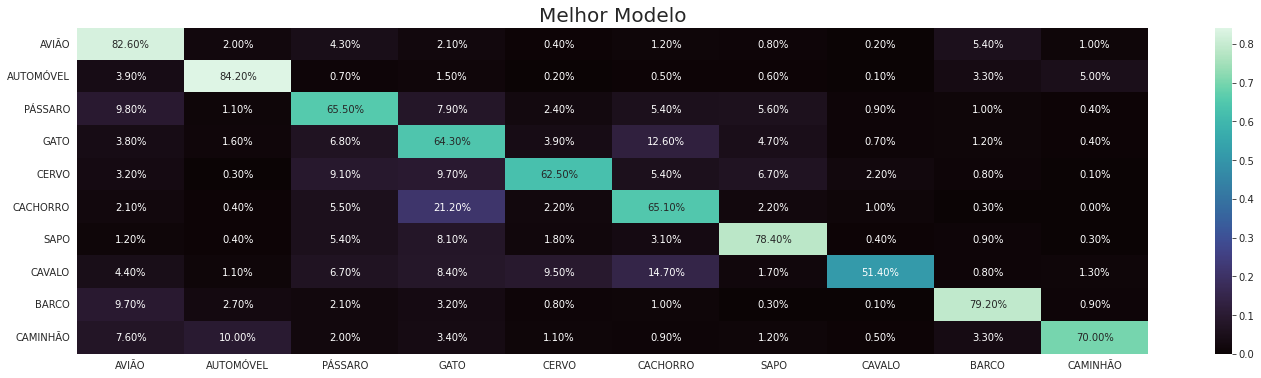

Métricas do modelo -------------------------------
Melhor Modelo
              precision    recall  f1-score   support

       AVIÃO       0.64      0.83      0.72      1000
   AUTOMÓVEL       0.81      0.84      0.83      1000
     PÁSSARO       0.61      0.66      0.63      1000
        GATO       0.50      0.64      0.56      1000
       CERVO       0.74      0.62      0.68      1000
    CACHORRO       0.59      0.65      0.62      1000
        SAPO       0.77      0.78      0.78      1000
      CAVALO       0.89      0.51      0.65      1000
       BARCO       0.82      0.79      0.81      1000
    CAMINHÃO       0.88      0.70      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.73      0.70      0.71     10000
weighted avg       0.73      0.70      0.71     10000



In [ ]:
# Avaliação no conjunto de teste

print('Matriz de Confusão -----------------------------------')
plt.title('Melhor Modelo', size = 20)
best_model.plot_confusion_matrix(y = y_test, x = test_features, labels=labels)
plt.show()

print('Métricas do modelo -------------------------------')
print('Melhor Modelo')
print(classification_report(y_test, np.argmax(best_model.model.predict(test_features), axis=1), target_names=labels))

**9. (2,0) Sumarize os seus resultados e conclusões em relação aos resultados experimentais.**



1.   **Função de Ativação**: é possível notar que os resultados com a função ReLU foram superiores ao da tanh e sigmoide. 
2.   **Estrutura da Rede**: observa-se que uma rede mais complexa apresenta um decaimento mais suave das funções de custo do que o restante, sendo uma candidata mais factível para o modelo final
3.   **Função de Inicialização**: a princípio a função random normal apresenta um bom desempenho com uma redução mais acentuada da função da custo na validação e treino. Entretanto para o modelo final optou-se pela Glorot Uniform após avaliação das métricas na validação.
4.   **Função de Regularização**: a aplicação de regularização foi em geral benéfica, entretanto não em excesso. No caso, a aplicação de Ridge L2 com fator 0.01 foi positiva e a com fator 0.1 já levou ao underfitting. No modelo final testamos com 0.01 e foi excessiva, portanto reduzimos para 0.001
5.   **Dropout**: o uso de dropout nas camadas finais FC foi uma adição que gera ganhos ao modelo final, tanto em termos de acurácia quanto em termos de redução da função de custo em função de épocas. Utilizou-se um dropout de 20% no modelo final
6.   **Modelo Final**: para esse modelo buscou-se aplicar todas as técnicas que geraram ganho nas avaliações passadas e também procurou-se ajustar algumas camadas empiricamente. Por exemplo, aumentou-se o número de neurônios em determinadas etapas e também incluiu-se camadas de BatchNormalization. O resultado final foi muito positivo com uma acurácia de ~0.70 no teste.
